Week 2 code diary - run thru the rasters week 5 and 6 lab t2t with Tsitika bare earth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import cartopy.crs as ccrs
import os

%matplotlib inline

In [2]:
#change directory to working drive
os.chdir(r"H:\Tsitika\2021\DEM")

Tsit_be = rio.open(r'Bare_Earth\Tsitika_3m_Snow_Free_DTM_WGS84_z9_ellips.tif')

### Rasterio: easy way to open raster data. Creates a python object which can be queryed. 
Can check the attributes of the .tif file using ".attribute"

In [3]:
print(Tsit_be.bounds)
print(Tsit_be.crs)
print(Tsit_be.res)
print(Tsit_be.bounds[1])

BoundingBox(left=682263.72, bottom=5566966.44, right=698691.72, top=5585230.44)
EPSG:32609
(3.0, 3.0)
5566966.44


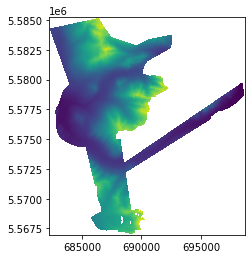

<AxesSubplot:>

In [4]:
#rasterio built in function to examine data
rio.plot.show(Tsit_be)

###### Assign raster to numpy array using the src.read function, make sure to assign which band you are reading.

In [5]:
data = Tsit_be.read(1)
print(data.shape)
print(type(data))

(6088, 5476)
<class 'numpy.ndarray'>


1233.9326
<class 'numpy.float32'>


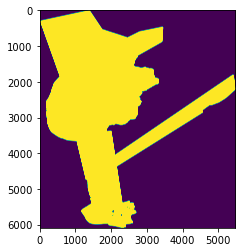

In [6]:
# this is the value in position [100,1000]
print(data[100,1000])

# get data type
print(type(data[0,0]))

# use matplotlib imshow
plt.imshow(data) 


Text(0, 0.5, 'Count')

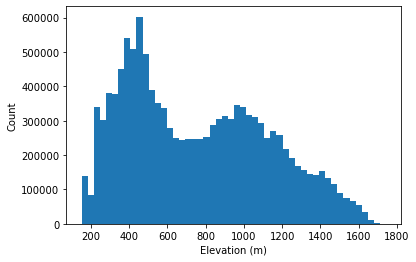

In [7]:
# flatten the data to a 1D array
data_ravel = np.ravel(data)

#extract data values where elevation is less than zero
a = data_ravel<0

#historgram using matplotlib, specfies with the approx sign to do the inverse, and 50 is the number of bins
plt.hist(data_ravel[~a], 50)
plt.xlabel('Elevation (m)')
plt.ylabel('Count')


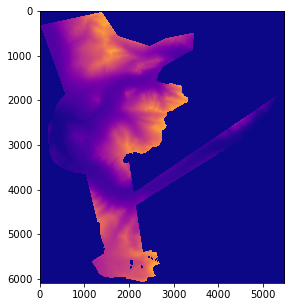

In [8]:
#create the figures and axes w. subplot
fig, ax = plt.subplots(figsize=(5,5))

#This is a cheat way to add the axis to the data. 
image_hidden = ax.imshow(data, 
                         cmap='plasma', 
                         vmin=200, 
                         vmax=2000)

# image = rio.plot.show(Tsit_be, ax = ax,
#                       cmap='plasma',
#                       vmin=200,
#                       vmax=2000,
#                       title='Tsitika LiDAR data')
# cb = plt.colorbar(image_hidden)
# cb.set_label('Elevation (m)')

In [9]:
type(Tsit_be)

rasterio.io.DatasetReader

(682263.72, 698691.72, 5566966.44, 5585230.44)


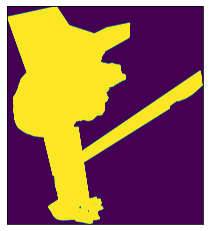

In [10]:
img_extent = (rio.plot.plotting_extent(Tsit_be))
print(img_extent)

plt.figure()
ax = plt.axes(projection=ccrs.UTM(9))
ax.imshow(data, origin="upper", extent = img_extent, transform=ccrs.UTM(9))

In [11]:
#mask the data, takes an array as an input and the value that will be masked out. ie. the no data values

#data_ma = np.ma.masked_array(data, -3.4028234663852886e+38)
# or could use the masked_less function
data_ma = np.ma.masked_less(data,0)
data_ma

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

Now, have two arrays, the data array and the masked array, and the data_ma is both as one. The mask area is a boolean, either true or false values.

In [12]:
display(data_ma.shape)

(6088, 5476)

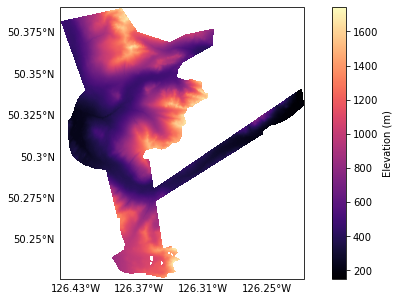

In [13]:
plt.figure(figsize=(10,5))
proj = ccrs.UTM(9)

#set axes with projection
ax = plt.axes(projection = proj)

#use plt.imshow, which takes an array, and specify the geospatial extent of the data (in the same CRS as your axes!)
plt.imshow(data_ma, 
           extent = img_extent,
           cmap='magma')
# create a gridline object, then turn off the x and y grid lines. Creates 
gl = ax.gridlines(draw_labels = True)
gl.xlines = None
gl.ylines = None
gl.top_labels = False
gl.right_labels = False

# create a colorbar
cb = plt.colorbar()
cb.set_label('Elevation (m)')

#plt.tight_layout()

Now, will import my snow on raster, subtract the bare earth, and create the same plot.

In [14]:
Tsi_P01 = rio.open(r"H:\Tsitika\2021\DEM\coregistered_STM_GUI\P01_Tsi_slave.tif")

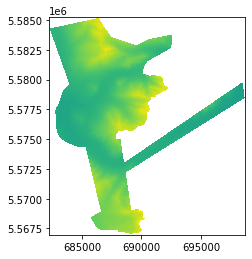

<AxesSubplot:>

In [15]:
rio.plot.show(Tsi_P01)

In [16]:
# convert the snowdepth raster to an array
data_P01 = Tsi_P01.read(1)
print(data_P01.shape)

#checking if the shape, crs, and resolution are the same
data.shape == data_P01.shape
#for crs, query the meta attributes of the tif as a python object, ie. rio open, as opposed to read as an array.
Tsit_be.crs == Tsi_P01.crs


(6088, 5476)


True

In [19]:
snowdepth_P01 = data_P01 - data
display(snowdepth_P01[1000,1000])

1.2782593